In [2]:
import numpy as np

In [4]:
np.ones((10, 5)).shape

(10, 5)

In [7]:
np.ones((3, 4, 5), dtype=np.float64).strides

(160, 40, 8)

## 数组重塑

In [8]:
arr = np.arange(8)

In [9]:
arr

array([0, 1, 2, 3, 4, 5, 6, 7])

### .reshape

In [10]:
arr.reshape((4, 2))

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7]])

In [11]:
arr = np.arange(12)

In [12]:
arr

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [14]:
arr.reshape((4, 3), order="C")

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

In [15]:
arr.reshape((4, 3), order="F")

array([[ 0,  4,  8],
       [ 1,  5,  9],
       [ 2,  6, 10],
       [ 3,  7, 11]])

多维数组重塑

In [16]:
arr = np.arange(8)

In [17]:
arr.reshape((4, 2)).reshape((2, 4))

array([[0, 1, 2, 3],
       [4, 5, 6, 7]])

作为参数的形状的其中一维可以是－1，它表示该维度的大小由数据本身推断而来：

In [18]:
arr = np.arange(15)

In [19]:
arr.reshape((5, -1))

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11],
       [12, 13, 14]])

### .ravel

与reshape将一维数组转换为多维数组的运算过程相反的运算通常称为扁平化（flattening）或散开（raveling）

In [21]:
arr = np.arange(15).reshape((5, -1))

In [22]:
arr

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11],
       [12, 13, 14]])

In [23]:
arr.ravel()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

### .flatten

如果结果中的值与原始数组相同，ravel不会产生源数据的副本。

flatten方法的行为类似于ravel，只不过它总是返回数据的副本：

In [25]:
arr.flatten()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

## C和Fortran顺序

行优先和列优先

C/行优先顺序：先经过更高的维度（例如，轴1会先于轴0被处理）。

Fortran/列优先顺序：后经过更高的维度（例如，轴0会先于轴1被处理）。

In [26]:
arr = np.arange(12).reshape((3, 4))

In [27]:
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [28]:
arr.ravel()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [29]:
arr.ravel("F")

array([ 0,  4,  8,  1,  5,  9,  2,  6, 10,  3,  7, 11])

## 数组的合并和拆分

### .concatenate

In [30]:
arr1 = np.array([[1, 2, 3], [4, 5, 6]])

In [31]:
arr2 = np.array([[7, 8, 9], [10, 11, 12]])

In [32]:
np.concatenate([arr1, arr2], axis=0)

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

In [33]:
np.concatenate([arr1, arr2], axis=1)

array([[ 1,  2,  3,  7,  8,  9],
       [ 4,  5,  6, 10, 11, 12]])

### .vstack

In [34]:
np.vstack((arr1, arr2))

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

### .hstack

In [35]:
np.hstack((arr1, arr2))

array([[ 1,  2,  3,  7,  8,  9],
       [ 4,  5,  6, 10, 11, 12]])

### .split

split用于将一个数组沿指定轴拆分为多个数组：

In [36]:
arr = np.random.randn(5, 2)

In [37]:
arr

array([[ 0.72693987,  0.67566332],
       [ 1.60732805,  1.98285315],
       [-1.89519612, -0.46213864],
       [ 0.42113732,  0.02691475],
       [ 0.96645628, -1.48821825]])

In [46]:
one, two, three = np.split(arr, [1, 3])

In [47]:
one

array([[0.72693987, 0.67566332]])

In [48]:
two

array([[ 1.60732805,  1.98285315],
       [-1.89519612, -0.46213864]])

In [49]:
three

array([[ 0.42113732,  0.02691475],
       [ 0.96645628, -1.48821825]])

传入到np.split的值[1,3]指示在哪个索引处分割数组。

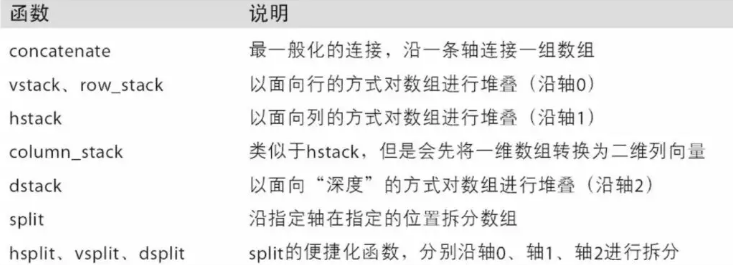

## 堆叠辅助类：r和c

In [50]:
arr = np.arange(6)

In [51]:
arr1 = arr.reshape((3, 2))

In [52]:
arr2 = np.random.randn(3, 2)

In [53]:
np.r_[arr1, arr2]

array([[ 0.        ,  1.        ],
       [ 2.        ,  3.        ],
       [ 4.        ,  5.        ],
       [ 0.01316446, -0.66426154],
       [ 0.3129766 ,  0.71087372],
       [ 0.23736556,  0.29726088]])

In [54]:
np.c_[np.r_[arr1, arr2], arr]

array([[ 0.        ,  1.        ,  0.        ],
       [ 2.        ,  3.        ,  1.        ],
       [ 4.        ,  5.        ,  2.        ],
       [ 0.01316446, -0.66426154,  3.        ],
       [ 0.3129766 ,  0.71087372,  4.        ],
       [ 0.23736556,  0.29726088,  5.        ]])

将切片转换成数组：

In [55]:
np.c_[1:6, -10:-5]

array([[  1, -10],
       [  2,  -9],
       [  3,  -8],
       [  4,  -7],
       [  5,  -6]])

## 元素的重复操作：tile和repeat

### .repeat

repeat会将数组中的各个元素重复一定次数，从而产生一个更大的数组：

In [56]:
arr = np.arange(3)

In [57]:
arr

array([0, 1, 2])

In [58]:
arr.repeat(3)

array([0, 0, 0, 1, 1, 1, 2, 2, 2])

如果传入的是一个整数，则各元素就都会重复那么多次。

In [59]:
arr.repeat([2, 3, 4])

array([0, 0, 1, 1, 1, 2, 2, 2, 2])

In [60]:
arr = np.random.randn(2, 2)

In [61]:
arr

array([[ 1.52058878, -0.01802996],
       [ 0.11932917,  1.32143672]])

In [62]:
arr.repeat(2, axis=0)

array([[ 1.52058878, -0.01802996],
       [ 1.52058878, -0.01802996],
       [ 0.11932917,  1.32143672],
       [ 0.11932917,  1.32143672]])

注意：如果没有设置轴向，则数组会被扁平化，这可能不会是你想要的结果。

In [63]:
arr.repeat(2)

array([ 1.52058878,  1.52058878, -0.01802996, -0.01802996,  0.11932917,
        0.11932917,  1.32143672,  1.32143672])

在对多维进行重复时，也可以传入一组整数，这样就会使各切片重复不同的次数：

In [64]:
arr.repeat([2, 3], axis=0)

array([[ 1.52058878, -0.01802996],
       [ 1.52058878, -0.01802996],
       [ 0.11932917,  1.32143672],
       [ 0.11932917,  1.32143672],
       [ 0.11932917,  1.32143672]])

In [65]:
arr.repeat([2, 3], axis=1)

array([[ 1.52058878,  1.52058878, -0.01802996, -0.01802996, -0.01802996],
       [ 0.11932917,  0.11932917,  1.32143672,  1.32143672,  1.32143672]])

### .tile

tile的功能是沿指定轴向堆叠数组的副本。你可以形象地将其想象成“铺瓷砖”：

In [66]:
arr

array([[ 1.52058878, -0.01802996],
       [ 0.11932917,  1.32143672]])

In [67]:
np.tile(arr, 2)

array([[ 1.52058878, -0.01802996,  1.52058878, -0.01802996],
       [ 0.11932917,  1.32143672,  0.11932917,  1.32143672]])

In [68]:
np.tile(arr, (2, 1))

array([[ 1.52058878, -0.01802996],
       [ 0.11932917,  1.32143672],
       [ 1.52058878, -0.01802996],
       [ 0.11932917,  1.32143672]])

In [69]:
np.tile(arr, (3, 2))

array([[ 1.52058878, -0.01802996,  1.52058878, -0.01802996],
       [ 0.11932917,  1.32143672,  0.11932917,  1.32143672],
       [ 1.52058878, -0.01802996,  1.52058878, -0.01802996],
       [ 0.11932917,  1.32143672,  0.11932917,  1.32143672],
       [ 1.52058878, -0.01802996,  1.52058878, -0.01802996],
       [ 0.11932917,  1.32143672,  0.11932917,  1.32143672]])

## 花式索引的等价函数：take和put

### 花式索引

In [70]:
arr = np.arange(10) * 100

In [71]:
inds = [7, 1, 2, 6]

In [73]:
arr

array([  0, 100, 200, 300, 400, 500, 600, 700, 800, 900])

In [72]:
arr[inds]

array([700, 100, 200, 600])

### .take

In [74]:
arr.take(inds)

array([700, 100, 200, 600])

要在其它轴上使用take，只需传入axis关键字即可：

In [86]:
inds = [2, 0, 2, 1]

In [88]:
arr = np.random.randn(2, 4)

In [89]:
arr

array([[ 0.64116758, -0.18194886, -1.13307788, -1.52076557],
       [ 0.44667032,  0.58785511,  0.54883539,  1.15377667]])

In [90]:
arr.take(inds, axis=1)

array([[-1.13307788,  0.64116758, -1.13307788, -0.18194886],
       [ 0.54883539,  0.44667032,  0.54883539,  0.58785511]])

### .put

put不接受axis参数

In [80]:
inds = [7, 1, 2, 6]

In [81]:
arr.put(inds, 42)

In [82]:
arr

array([  0,  42,  42, 300, 400, 500,  42,  42, 800, 900])

In [83]:
arr.put(inds, [40, 41, 42, 43])

In [84]:
arr

array([  0,  41,  42, 300, 400, 500,  43,  40, 800, 900])

## 广播

广播（broadcasting）指的是不同形状的数组之间的算术运算的执行方式。

它是一种非常强大的功能，但也容易令人误解，即使是经验丰富的老手也是如此。

将标量值跟数组合并时就会发生最简单的广播：

这里我们说：在这个乘法运算中，标量值4被广播到了其他所有的元素上。

In [91]:
arr = np.arange(5)

In [92]:
arr

array([0, 1, 2, 3, 4])

In [93]:
arr * 4

array([ 0,  4,  8, 12, 16])

### 距平化处理

In [104]:
arr = np.random.randn(4, 3)

In [105]:
arr

array([[ 0.48054075, -0.27457283,  0.40042898],
       [-0.16112855,  1.39777687, -2.54130897],
       [-0.08079836, -0.40099394, -0.23935382],
       [ 0.75556564,  0.92918217, -0.15840868]])

In [106]:
arr.mean(0)

array([ 0.24854487,  0.41284807, -0.63466062])

In [107]:
demeaned = arr - arr.mean(0)

In [108]:
demeaned

array([[ 0.23199588, -0.6874209 ,  1.0350896 ],
       [-0.40967342,  0.9849288 , -1.90664834],
       [-0.32934323, -0.81384201,  0.3953068 ],
       [ 0.50702077,  0.51633411,  0.47625194]])

In [109]:
demeaned.mean(0)

array([0.0000000e+00, 0.0000000e+00, 1.2490009e-16])

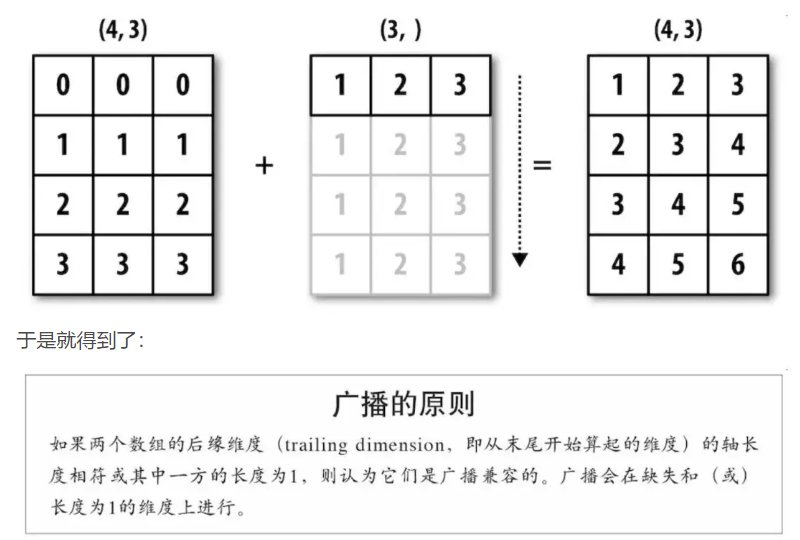

In [119]:
arr

array([[ 0.48054075, -0.27457283,  0.40042898],
       [-0.16112855,  1.39777687, -2.54130897],
       [-0.08079836, -0.40099394, -0.23935382],
       [ 0.75556564,  0.92918217, -0.15840868]])

In [120]:
row_means = arr.mean(1)

In [121]:
row_means

array([ 0.2021323 , -0.43488688, -0.24038204,  0.50877971])

In [122]:
row_means.shape

(4,)

In [123]:
row_means.reshape(4, 1)

array([[ 0.2021323 ],
       [-0.43488688],
       [-0.24038204],
       [ 0.50877971]])

In [124]:
demeaned = arr - row_means.reshape(4, 1)

In [125]:
demeaned.mean(1)

array([ 2.77555756e-17,  1.48029737e-16, -1.85037171e-17,  3.70074342e-17])

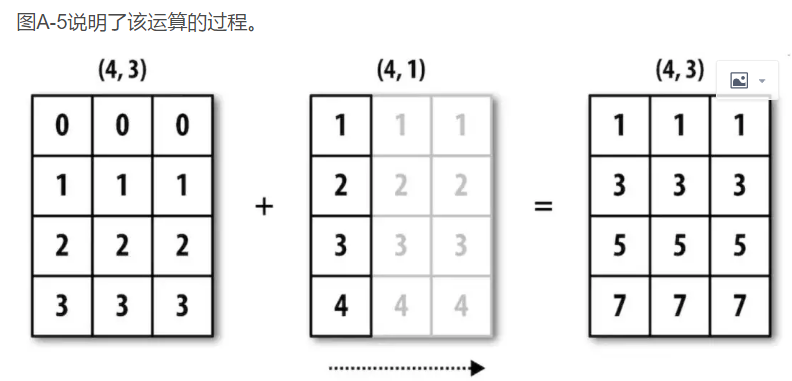

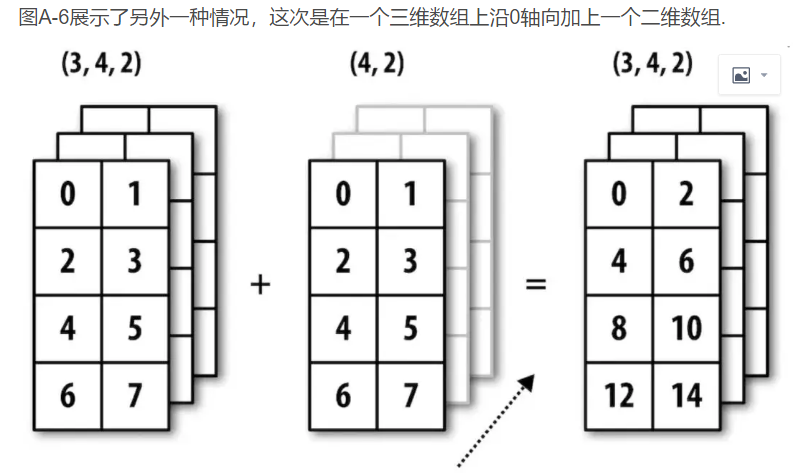

### 沿其它轴向广播

In [126]:
arr

array([[ 0.48054075, -0.27457283,  0.40042898],
       [-0.16112855,  1.39777687, -2.54130897],
       [-0.08079836, -0.40099394, -0.23935382],
       [ 0.75556564,  0.92918217, -0.15840868]])

In [127]:
arr - arr.mean(1).reshape((4, 1))

array([[ 2.78408451e-01, -4.76705130e-01,  1.98296679e-01],
       [ 2.73758332e-01,  1.83266375e+00, -2.10642208e+00],
       [ 1.59583678e-01, -1.60611898e-01,  1.02822016e-03],
       [ 2.46785927e-01,  4.20402465e-01, -6.67188392e-01]])

对于三维的情况，在三维中的任何一维上广播其实也就是将数据重塑为兼容的形状而已。

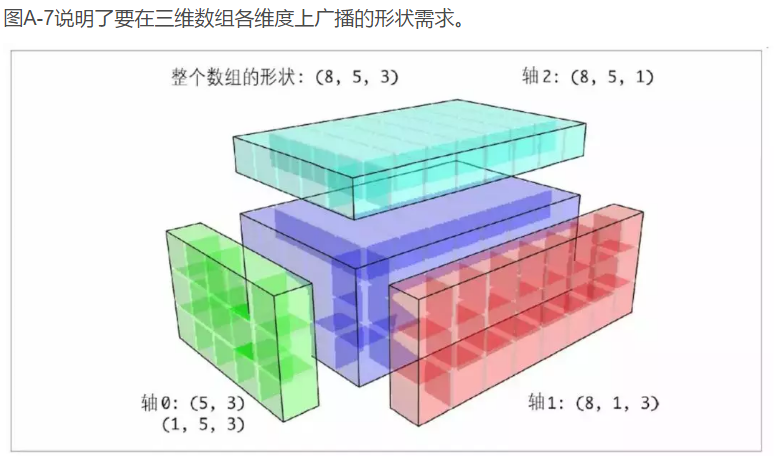

In [128]:
arr = np.zeros((4, 4))

In [129]:
arr

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [131]:
arr_3d = arr[:, np.newaxis, :]

In [132]:
arr_3d.shape

(4, 1, 4)

In [133]:
arr_1d = np.random.normal(size=3)

In [134]:
arr_1d[:, np.newaxis]

array([[ 0.36265988],
       [-1.47470445],
       [-0.47906706]])

In [135]:
arr_1d[np.newaxis, :]

array([[ 0.36265988, -1.47470445, -0.47906706]])

如果我们有一个三维数组，并希望对轴2进行距平化，那么只需要编写下面这样的代码就可以了：

In [136]:
arr = np.random.randn(3, 4, 5)

In [137]:
depth_means = arr.mean(2)

In [138]:
depth_means

array([[-1.04666132, -0.62284291,  0.09674663, -0.29739226],
       [-0.57711785, -0.17233105,  0.22415947, -0.44840714],
       [-0.14951131, -0.46144208,  0.87496151,  0.22751338]])

In [139]:
depth_means.shape

(3, 4)

In [140]:
demeaned = arr - depth_means[:, :, np.newaxis]

In [141]:
demeaned.mean(2)

array([[ 0.00000000e+00, -8.88178420e-17,  2.22044605e-17,
         1.11022302e-17],
       [-4.44089210e-17,  4.44089210e-17,  0.00000000e+00,
         2.22044605e-17],
       [ 4.44089210e-17, -2.22044605e-17,  4.44089210e-17,
        -2.22044605e-17]])

在对指定轴进行距平化时，有没有一种既通用又不牺牲性能的方法呢？实际上是有的，但需要一些索引方面的技巧：

In [142]:
def demean_axis(arr, axis=0):
    means = arr.mean(axis)
    # This generalizes things like [:, :, np.newaxis] to N dimensions
    indexer = [slice(None)] * arr.ndim
    indexer[axis] = np.newaxis
    return arr - means[indexer]

### 通过广播设置数组的值

算术运算所遵循的广播原则同样也适用于通过索引机制设置数组值的操作。

In [144]:
arr = np.zeros((4, 3))

In [145]:
arr[:] = 5

In [146]:
arr

array([[5., 5., 5.],
       [5., 5., 5.],
       [5., 5., 5.],
       [5., 5., 5.]])

假设我们想要用一个一维数组来设置目标数组的各列，只要保证形状兼容就可以了：

In [147]:
col = np.array([1.28, -0.42, 0.44, 1.6])

In [150]:
col[:, np.newaxis]

array([[ 1.28],
       [-0.42],
       [ 0.44],
       [ 1.6 ]])

In [148]:
arr[:] = col[:, np.newaxis]

In [149]:
arr

array([[ 1.28,  1.28,  1.28],
       [-0.42, -0.42, -0.42],
       [ 0.44,  0.44,  0.44],
       [ 1.6 ,  1.6 ,  1.6 ]])

In [151]:
arr[:2] = [[-1.37], [0.509]]

In [152]:
arr

array([[-1.37 , -1.37 , -1.37 ],
       [ 0.509,  0.509,  0.509],
       [ 0.44 ,  0.44 ,  0.44 ],
       [ 1.6  ,  1.6  ,  1.6  ]])

### ufunc 高级应用

#### .reduce

reduce接受一个数组参数，并通过一系列的二元运算对其值进行聚合（可指明轴向）。

In [153]:
arr = np.arange(10)

In [154]:
np.add.reduce(arr)

45

In [155]:
arr.sum()

45

#### np.logical_and

约简运算

In [156]:
np.random.seed(12346)

In [157]:
arr = np.random.randn(5, 5)

In [159]:
arr[::2].sort(1)

In [160]:
arr[:, :-1] < arr[:, 1:]

array([[ True,  True,  True,  True],
       [False,  True, False, False],
       [ True,  True,  True,  True],
       [ True, False,  True,  True],
       [ True,  True,  True,  True]])

In [161]:
np.logical_and.reduce(arr[:, :-1] < arr[:, 1:], axis=1)

array([ True, False,  True, False,  True])

注意，logical_and.reduce跟all方法是等价的。

#### .ccumulate

ccumulate跟reduce的关系就像cumsum跟sum的关系那样。

它产生一个跟原数组大小相同的中间“累计”值数组：

In [162]:
arr = np.arange(15).reshape((3, 5))

In [164]:
arr

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [163]:
np.add.accumulate(arr, axis=1)

array([[ 0,  1,  3,  6, 10],
       [ 5, 11, 18, 26, 35],
       [10, 21, 33, 46, 60]], dtype=int32)

#### .multiply.outer

outer用于计算两个数组的叉积：

In [165]:
arr = np.arange(3).repeat([1, 2, 2])

In [166]:
arr

array([0, 1, 1, 2, 2])

In [167]:
np.multiply.outer(arr, np.arange(5))

array([[0, 0, 0, 0, 0],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 2, 4, 6, 8],
       [0, 2, 4, 6, 8]])

outer输出结果的维度是两个输入数据的维度之和：

In [168]:
x, y = np.random.randn(3, 4), np.random.randn(5)

In [169]:
result = np.subtract.outer(x, y)

In [170]:
result.shape

(3, 4, 5)

#### .reduceat

reduceat用于计算“局部约简”，其实就是一个对数据各切片进行聚合的groupby运算。

它接受一组用于指示如何对值进行拆分和聚合的“面元边界”：

In [171]:
arr = np.arange(10)

In [172]:
np.add.reduceat(arr, [0, 5, 8])

array([10, 18, 17], dtype=int32)

最终结果是在arr[0:5]、arr[5:8]以及arr[8:]上执行的约简。

跟其他方法一样，这里也可以传入一个axis参数：

In [173]:
arr = np.multiply.outer(np.arange(4), np.arange(5))

In [174]:
arr

array([[ 0,  0,  0,  0,  0],
       [ 0,  1,  2,  3,  4],
       [ 0,  2,  4,  6,  8],
       [ 0,  3,  6,  9, 12]])

In [175]:
np.add.reduceat(arr, [0, 2, 4], axis=1)

array([[ 0,  0,  0],
       [ 1,  5,  4],
       [ 2, 10,  8],
       [ 3, 15, 12]], dtype=int32)

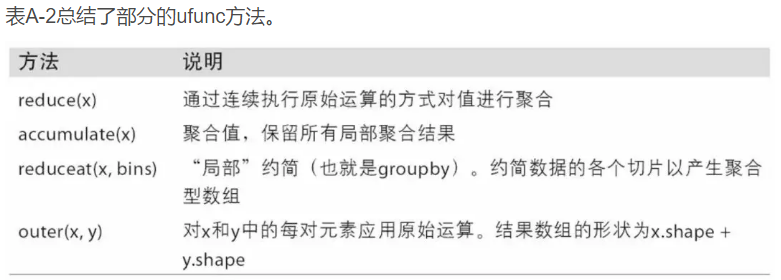

#### 编写新的ufunc

##### numpy.frompyfunc

numpy.frompyfunc接受一个Python函数以及两个分别表示输入输出参数数量的参数。

例如，下面是一个能够实现元素级加法的简单函数：

In [176]:
def add_elements(x, y):
    return x + y

In [177]:
add_them = np.frompyfunc(add_elements, 2, 1)

In [178]:
add_them(np.arange(8), np.arange(8))

array([0, 2, 4, 6, 8, 10, 12, 14], dtype=object)

##### numpy.vectorize

用frompyfunc创建的函数总是返回Python对象数组，这一点很不方便。

幸运的是，还有另一个办法，即numpy.vectorize。

虽然没有frompyfunc那么强大，但可以让你指定输出类型：

In [179]:
add_them = np.vectorize(add_elements, otypes=[np.float64])

In [180]:
add_them(np.arange(8), np.arange(8))

array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14.])

虽然这两个函数提供了一种创建ufunc型函数的手段，但它们非常慢，

因为它们在计算每个元素时都要执行一次Python函数调用，这就会比NumPy自带的基于C的ufunc慢很多：

In [181]:
arr = np.random.randn(10000)

In [182]:
%timeit add_them(arr, arr)

1.69 ms ± 38.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [183]:
%timeit np.add(arr, arr)

4.15 µs ± 78.4 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


## 排序

跟Python内置的列表一样，ndarray的sort实例方法也是就地排序。
也就是说，数组内容的重新排列是不会产生新数组的：

### .sort

In [187]:
arr = np.random.randn(6)

In [188]:
arr

array([-0.33176812, -1.47108206,  0.87050269, -0.08468875, -1.13286962,
       -1.01114869])

In [189]:
arr.sort()

In [190]:
arr

array([-1.47108206, -1.13286962, -1.01114869, -0.33176812, -0.08468875,
        0.87050269])

在对数组进行就地排序时要注意一点，如果目标数组只是一个视图，则原始数组将会被修改：

In [191]:
arr = np.random.randn(3, 5)

In [192]:
arr

array([[-0.34357617,  2.17140268,  0.12337075, -0.01893118,  0.17731791],
       [ 0.7423957 ,  0.85475634,  1.03797268, -0.32899594, -1.11807759],
       [-0.24152521, -2.0051193 ,  0.73788753, -1.06137462,  0.59545348]])

In [193]:
arr[:, 0].sort()

In [194]:
arr

array([[-0.34357617,  2.17140268,  0.12337075, -0.01893118,  0.17731791],
       [-0.24152521,  0.85475634,  1.03797268, -0.32899594, -1.11807759],
       [ 0.7423957 , -2.0051193 ,  0.73788753, -1.06137462,  0.59545348]])

### np.sort

In [195]:
arr = np.random.randn(5)

In [196]:
arr

array([-0.26822958,  1.33885804, -0.18715572,  0.91108374, -0.32150045])

In [200]:
np.sort(arr)

array([-0.32150045, -0.26822958, -0.18715572,  0.91108374,  1.33885804])

In [198]:
arr

array([-0.26822958,  1.33885804, -0.18715572,  0.91108374, -0.32150045])

axis参数

In [201]:
arr = np.random.randn(3, 5)

In [202]:
arr

array([[ 1.00543901, -0.51683937,  1.19251887, -0.19893404,  0.39691349],
       [-1.76381537,  0.60709023, -0.22215536, -0.21707838, -1.21357483],
       [-0.87044607, -0.2305542 ,  1.04376344, -1.14410284, -0.36360302]])

In [203]:
arr.sort(axis=1)

In [204]:
arr

array([[-0.51683937, -0.19893404,  0.39691349,  1.00543901,  1.19251887],
       [-1.76381537, -1.21357483, -0.22215536, -0.21707838,  0.60709023],
       [-1.14410284, -0.87044607, -0.36360302, -0.2305542 ,  1.04376344]])

### 降序排列

In [205]:
arr[:, ::-1]

array([[ 1.19251887,  1.00543901,  0.39691349, -0.19893404, -0.51683937],
       [ 0.60709023, -0.21707838, -0.22215536, -1.21357483, -1.76381537],
       [ 1.04376344, -0.2305542 , -0.36360302, -0.87044607, -1.14410284]])

### 间接排序：argsort和lexsort

## 结构化和记录式数组

为什么要用结构化数组

跟pandas的DataFrame相比，NumPy的结构化数组是一种相对较低级的工具。它可以将单个内存块解释为带有任意复杂嵌套列的表格型结构。由于数组中的每个元素在内存中都被表示为固定的字节数，所以结构化数组能够提供非常快速高效的磁盘数据读写（包括内存映像）、网络传输等功能。

结构化数组的另一个常见用法是，将数据文件写成定长记录字节流，这是C和C++代码中常见的数据序列化手段（业界许多历史系统中都能找得到）。只要知道文件的格式（记录的大小、元素的顺序、字节数以及数据类型等），就可以用np.fromfile将数据读入内存。这种用法超出了本书的范围，知道这点就可以了。